In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")

In [6]:
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [8]:
df.shape

(418, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [10]:
df.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


### Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [19]:
# Remove the dollar sign ('$') from the 'Payment ($)' column and convert to numeric
df['Payment'] = df['Payment ($)'].replace({'\$': '', ',': ''}, regex=True).astype(int)
# Fill NaN values with 0 in the 'Payment ($)' column
df['Payment'].fillna(0, inplace=True)

In [20]:
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Payment
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA,980
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0,NaT,USA,0
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA,1188
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0,NaT,USA,0
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0,NaT,USA,0


In [26]:
df.drop('Payment ($)', inplace=True, axis=1)

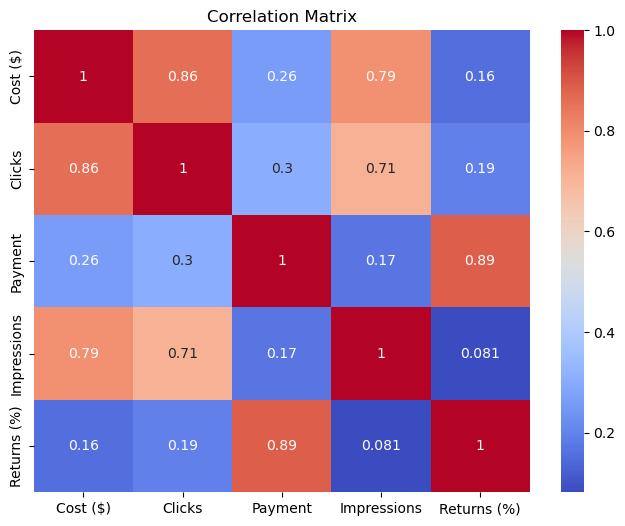

In [85]:
# Heatmap for Correlation Matrix
correlation_matrix = df[['Cost ($)', 'Clicks', 'Payment', 'Impressions', 'Returns (%)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Finding the returns by 
           Payment / Cost
          

In [28]:
df['Returns (%)'] = (df['Payment'] / df['Cost ($)']) * 100
df

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment Date,Country,Payment,Returns (%)
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,2021-02-03,USA,980,2556.744065
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaT,USA,0,0.000000
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,2021-03-13,USA,1188,2632.395302
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaT,USA,0,0.000000
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaT,USA,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaT,USA,0,NaN
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaT,USA,0,NaN
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaT,USA,0,NaN
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaT,USA,0,NaN


In [43]:
df['Returns (%)'].fillna(0, inplace=True)

In [44]:
df['Week'] = pd.to_datetime(df['Week'])  # Convert 'Week' column to datetime type

In [45]:
df['Month'] = df['Week'].dt.to_period('M')  # Extract month from the 'Week' column

In [46]:
report_weekly = df.groupby(['Week'])[['Cost ($)', 'Payment', 'Returns (%)']].agg({'Cost ($)': 'sum', 'Payment': 'sum', 'Returns (%)': 'mean'})

In [47]:
report_weekly

,Cost ($),Payment,Returns (%)
Week,,,
2021-01-25,154.79,2168,192.190347
2021-02-01,192.58,0,0.000000
2021-02-08,216.13,980,325.311203
2021-02-15,235.30,1788,339.272500
2021-02-22,190.90,0,0.000000
2021-03-01,141.40,980,85.888065
2021-03-08,258.20,0,0.000000
2021-03-15,184.36,0,0.000000
2021-03-22,308.73,2388,140.050437


In [48]:
report_monthly = df.groupby(['Month'])[['Cost ($)', 'Payment', 'Returns (%)']].agg({'Cost ($)': 'sum', 'Payment': 'sum', 'Returns (%)': 'mean'})

In [49]:
report_monthly

,Cost ($),Payment,Returns (%)
Month,,,
2021-01,154.79,2168,192.190347
2021-02,834.91,2768,159.741922
2021-03,1064.80,3368,49.171476
2021-04,504.81,2388,125.349067
2021-05,229.37,1188,62.390370


In [50]:
df

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment Date,Country,Payment,Returns (%),Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,2021-02-03,USA,980,2556.744065,2021-01
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaT,USA,0,0.000000,2021-01
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,2021-03-13,USA,1188,2632.395302,2021-01
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaT,USA,0,0.000000,2021-01
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaT,USA,0,0.000000,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,NaT,USA,0,0.000000,2021-05
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,NaT,USA,0,0.000000,2021-05
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,NaT,USA,0,0.000000,2021-05
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,NaT,USA,0,0.000000,2021-05


### Identify the Most Profitable Channel

In [51]:
report_campaign = df.groupby(['Campaign'])[['Cost ($)', 'Payment', 'Returns (%)']].agg({'Cost ($)': 'sum', 'Payment': 'sum', 'Returns (%)': 'mean'})
most_profitable_channel = report_campaign[report_campaign['Returns (%)'] == report_campaign['Returns (%)'].max()]

In [52]:
report_campaign

,Cost ($),Payment,Returns (%)
Campaign,,,
EK_Generic_Quad-Tok_Pilates,100.88,0,0.000000
EK_Generic_Quad-Tok_Yoga,822.86,2168,105.348363
EK_Generic_Quad-Tok_Yoga_Singapore,6.38,0,0.000000
EK_Generic_Swimming,741.26,3368,75.448030
EK_Generic_Swimming_Canada,19.71,0,0.000000
EK_Generic_Swimming_Singapore,29.91,0,0.000000
EK_Generic_Swimming_UK,95.21,980,301.214077
EK_Generic_Tri-Tok_Pilates,39.16,0,0.000000
EK_Generic_Tri-Tok_Reservation,435.57,4176,518.996710


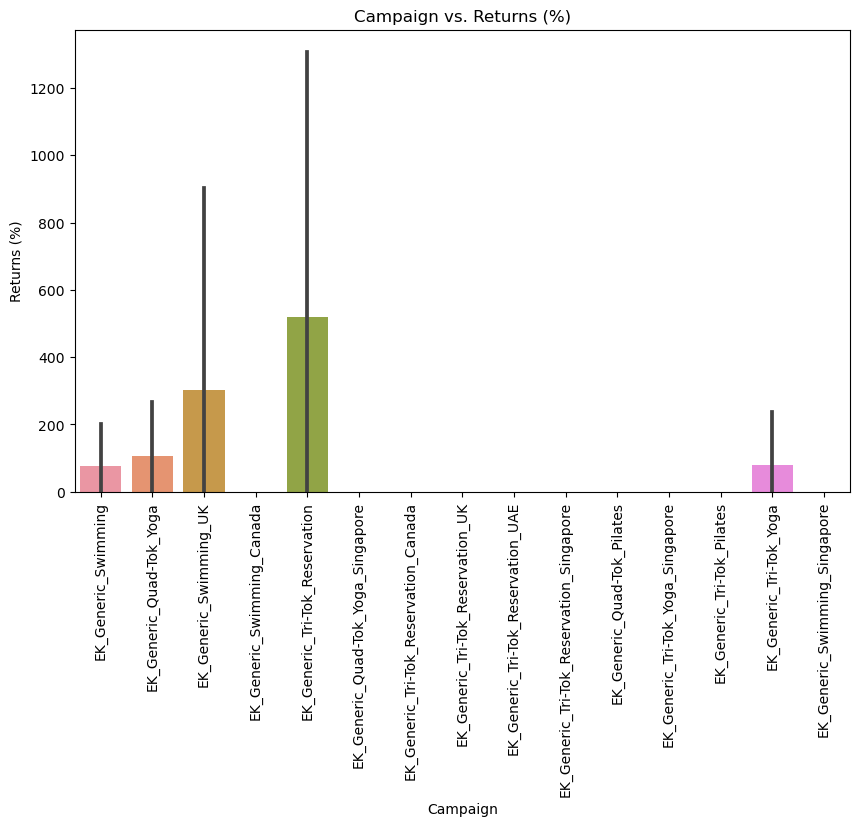

In [82]:
# Bar Chart for Campaign vs. Returns (%)
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign', y='Returns (%)', data=df)
plt.xlabel('Campaign')
plt.ylabel('Returns (%)')
plt.title('Campaign vs. Returns (%)')
plt.xticks(rotation=90)
plt.show()

In [53]:
most_profitable_channel

,Cost ($),Payment,Returns (%)
Campaign,,,
EK_Generic_Tri-Tok_Reservation,435.57,4176,518.99671


From the above table we can see even though the EK_Generic_Quad-Tok_Yoga and EK_Generic_Swimming are high in Payment the are gave less Returns than the EK_Generic_Tri-Tok_Reservation.

### Determine the Most Profitable Category/Keyword

In [54]:
report_keyword = df.groupby(['Keyword type', 'Search Keyword'])[['Cost ($)', 'Payment', 'Returns (%)']].agg({'Cost ($)': 'sum', 'Payment': 'sum', 'Returns (%)': 'mean'})
most_profitable_keyword = report_keyword[report_keyword['Returns (%)'] == report_keyword['Returns (%)'].max()]

In [55]:
report_keyword

Cost ($)  Payment  \
Keyword type Search Keyword                                          
Broad        =+pool +reservation software            0.00        0   
             pilates studio booking software       100.88        0   
             pool reservation software             307.48     3368   
             yoga studio app                        30.20        0   
             yoga studio booking software          790.17     2168   
             yoga studio software                    4.62        0   
Exact        pilates booking system                  0.00        0   
             pilates management software             0.00        0   
             pilates studio management software      0.00        0   
             pilates studio software                39.16        0   
             pilates studio software manager         0.00        0   
             pool booking app                       74.12        0   
             pool reservation software              26.45        0   
             pool reservation system               240.72      980   
             reservation management system          56.15     1788   
             swimming pool booking system           39.66        0   
             swimming pool reservation system       19.65        0   
             yoga studio app                        22.29        0   
             yoga studio booking software           39.07        0   
             yoga studio software                   23.06        0   
Phrase       booking management software           543.56        0   
             pilates booking system                  0.00        0   
             pilates studio software                 0.00        0   
             pool scheduling software              146.56        0   
             reservation management system         177.14     2388   
             yoga studio app                        10.63        0   
             yoga studio management software         0.00        0   
             yoga studio scheduling software         0.00        0   
             yoga studio software                   65.66     1188   

                                                 Returns (%)  
Keyword type Search Keyword                                   
Broad        =+pool +reservation software           0.000000  
             pilates studio booking software        0.000000  
             pool reservation software            268.635311  
             yoga studio app                        0.000000  
             yoga studio booking software         206.307211  
             yoga studio software                   0.000000  
Exact        pilates booking system                 0.000000  
             pilates management software            0.000000  
             pilates studio management software     0.000000  
             pilates studio software                0.000000  
             pilates studio software manager        0.000000  
             pool booking app                       0.000000  
             pool reservation software              0.000000  
             pool reservation system              159.796504  
             reservation management system        228.489643  
             swimming pool booking system           0.000000  
             swimming pool reservation system       0.000000  
             yoga studio app                        0.000000  
             yoga studio booking software           0.000000  
             yoga studio software                   0.000000  
Phrase       booking management software            0.000000  
             pilates booking system                 0.000000  
             pilates studio software                0.000000  
             pool scheduling software               0.000000  
             reservation management system        296.557548  
             yoga studio app                        0.000000  
             yoga studio management software        0.000000  
             yoga studio scheduling software       

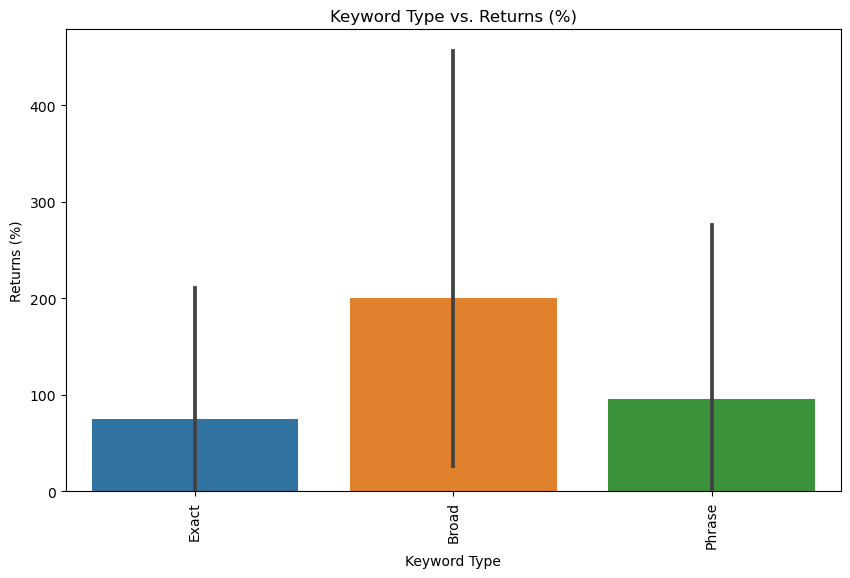

In [83]:
# Bar Chart for Keyword Type vs. Returns (%)
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword type', y='Returns (%)', data=df)
plt.xlabel('Keyword Type')
plt.ylabel('Returns (%)')
plt.title('Keyword Type vs. Returns (%)')
plt.xticks(rotation=90)
plt.show()

In [56]:
most_profitable_keyword

,,Cost ($),Payment,Returns (%)
Keyword type,Search Keyword,,,
Phrase,yoga studio software,65.66,1188,603.106914


We can see that yoga studio software from Phrase gives the high Returns than the others with high Payments.

### Analyze Data Points on Time Series Graphs

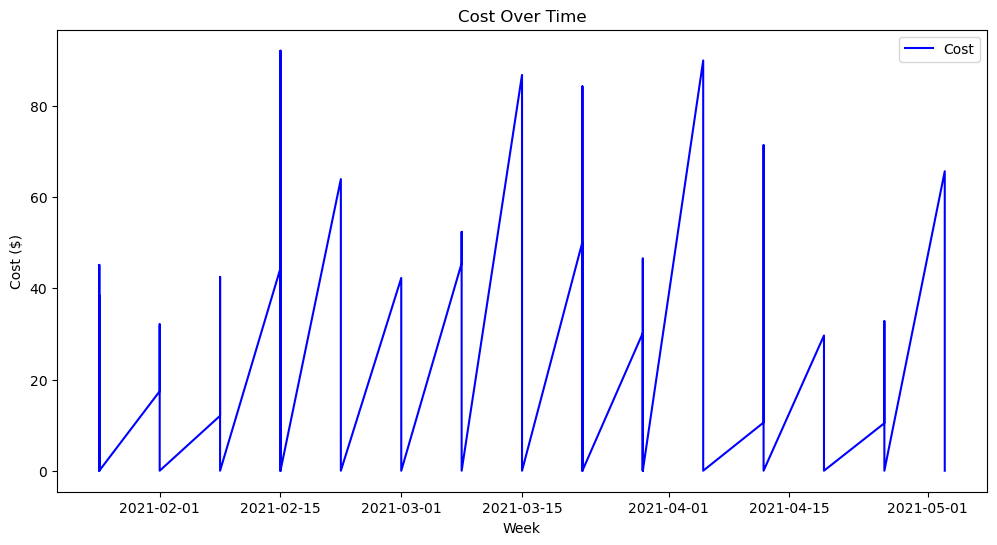

In [64]:
# Time Series Plot for Cost
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Cost ($)'], label='Cost', color='blue')
plt.xlabel('Week')
plt.ylabel('Cost ($)')
plt.legend()
plt.title('Cost Over Time')
plt.show()

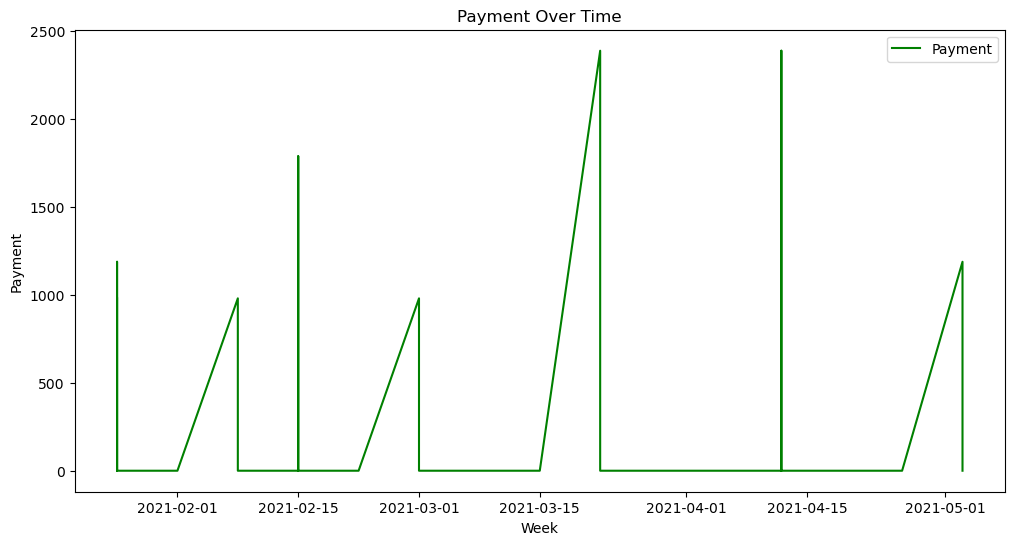

In [66]:
# Time Series Plot for Payment
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Payment'], label='Payment', color='green')
plt.xlabel('Week')
plt.ylabel('Payment')
plt.legend()
plt.title('Payment Over Time')
plt.show()

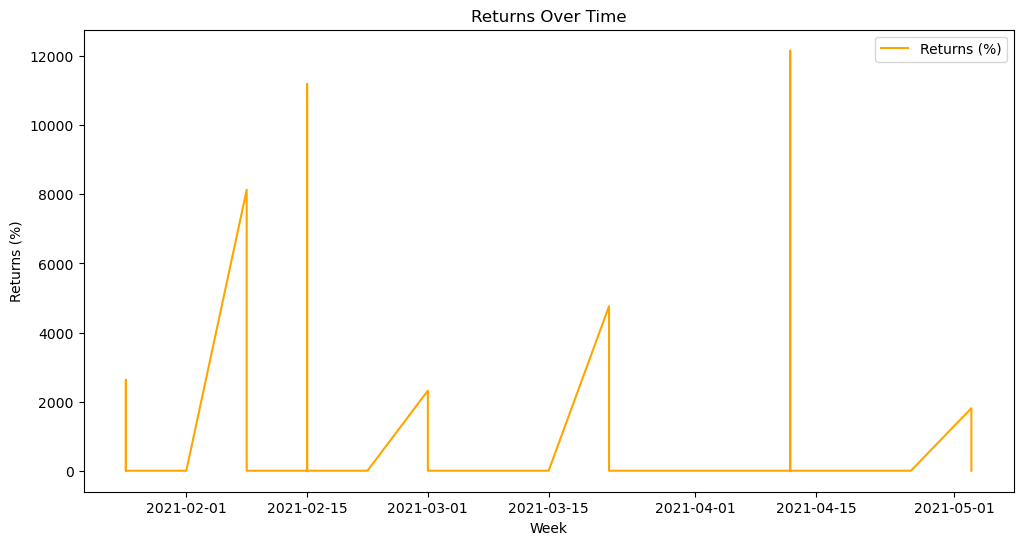

In [65]:
# Time Series Plot for Returns
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Returns (%)'], label='Returns (%)', color='orange')
plt.xlabel('Week')
plt.ylabel('Returns (%)')
plt.legend()
plt.title('Returns Over Time')
plt.show()

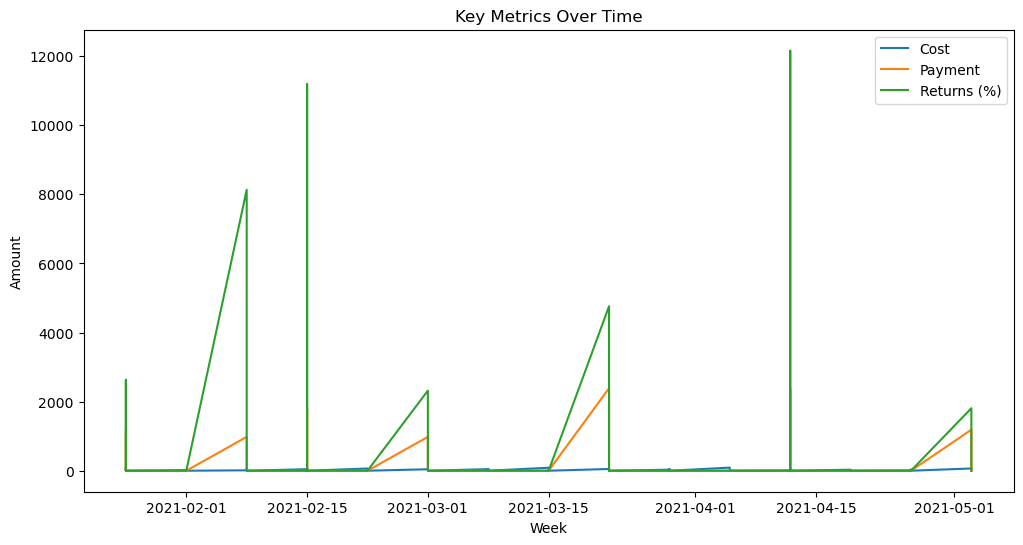

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df['Week'], df['Cost ($)'], label='Cost')
plt.plot(df['Week'], df['Payment'], label='Payment')
plt.plot(df['Week'], df['Returns (%)'], label='Returns (%)')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.title('Key Metrics Over Time')
plt.show()

### Analyze the Impact of Geography

In [67]:
report_country = df.groupby(['Country'])[['Cost ($)', 'Payment', 'Returns (%)']].agg({'Cost ($)': 'sum', 'Payment': 'sum', 'Returns (%)': 'mean'})
most_profitable_country = report_country[report_country['Returns (%)'] == report_country['Returns (%)'].max()]

In [69]:
most_profitable_country

,Cost ($),Payment,Returns (%)
Country,,,
USA,2788.68,11880,109.011447


In [72]:
# Calculate correlations between metrics
correlations = df[['Impressions', 'Clicks', 'Payment', 'Cost ($)', 'Returns (%)']].corr()
correlations

,Impressions,Clicks,Payment,Cost ($),Returns (%)
Impressions,1.000000,0.711892,0.168475,0.789016,0.081321
Clicks,0.711892,1.000000,0.304594,0.857770,0.194625
Payment,0.168475,0.304594,1.000000,0.260157,0.886716
Cost ($),0.789016,0.857770,0.260157,1.000000,0.155980
Returns (%),0.081321,0.194625,0.886716,0.155980,1.000000


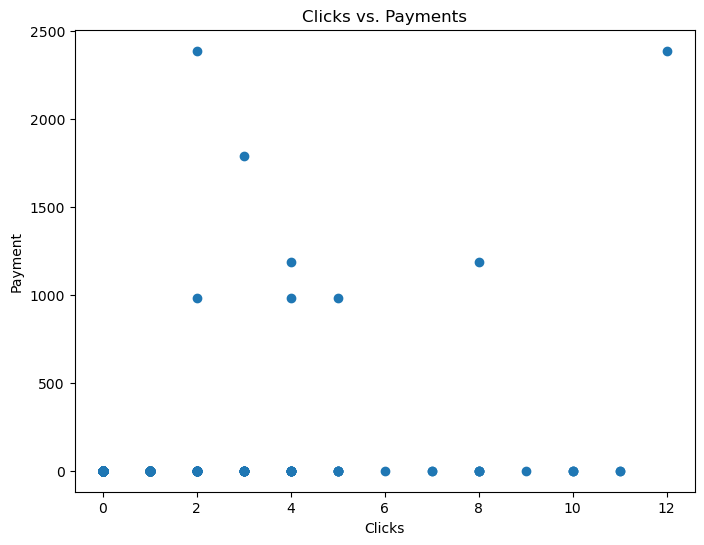

In [80]:
# Scatter Plot for Clicks vs. Payments
plt.figure(figsize=(8, 6))
plt.scatter(df['Clicks'], df['Payment'])
plt.xlabel('Clicks')
plt.ylabel('Payment')
plt.title('Clicks vs. Payments')
plt.show()

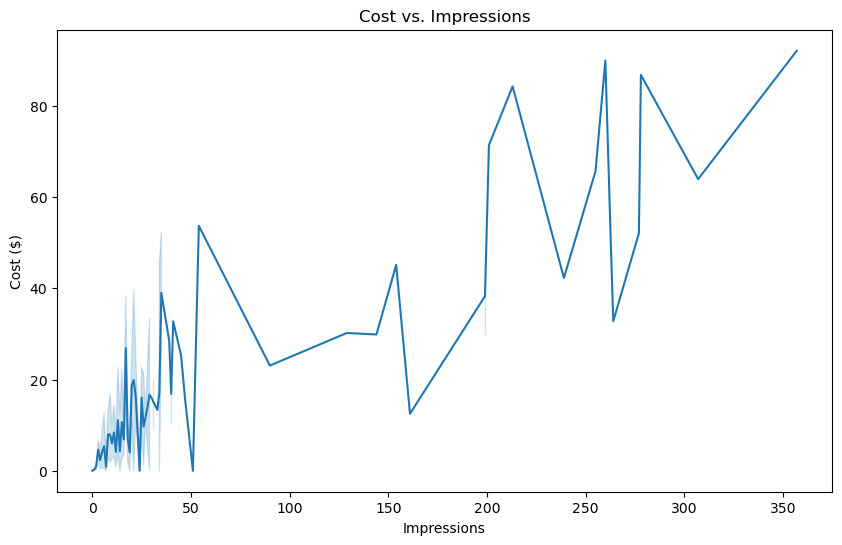

In [81]:
# Line Plot for Cost vs. Impressions
plt.figure(figsize=(10, 6))
sns.lineplot(x='Impressions', y='Cost ($)', data=df)
plt.xlabel('Impressions')
plt.ylabel('Cost ($)')
plt.title('Cost vs. Impressions')
plt.show()

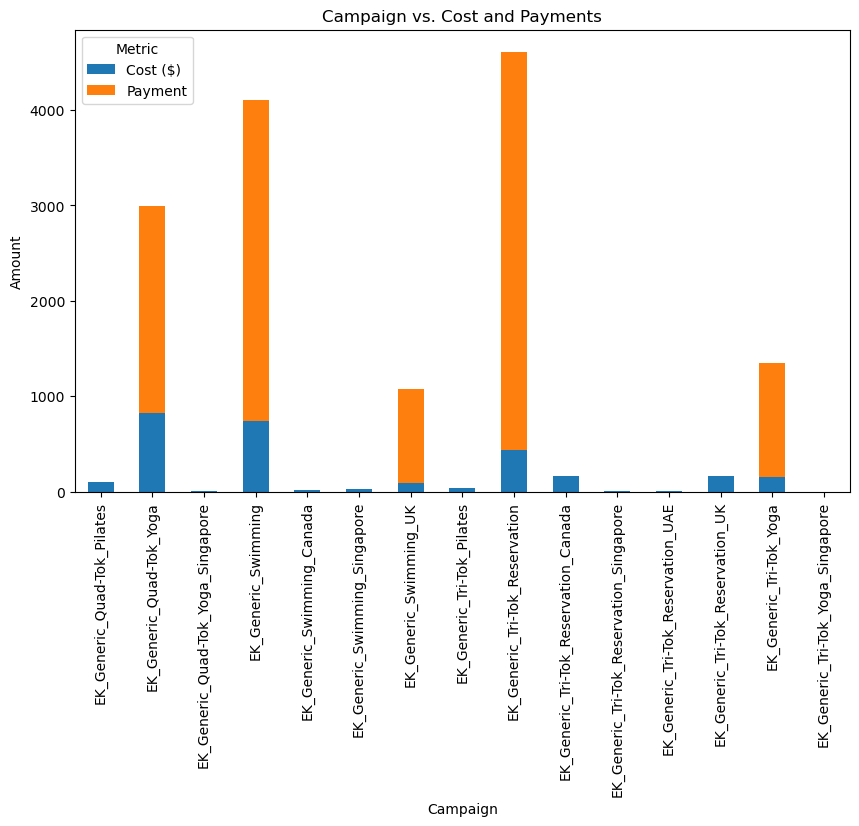

In [84]:
# Stacked Bar Chart for Campaign vs. Cost and Payments
df_campaign = df.groupby('Campaign')[['Cost ($)', 'Payment']].sum()
df_campaign.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Campaign')
plt.ylabel('Amount')
plt.title('Campaign vs. Cost and Payments')
plt.xticks(rotation=90)
plt.legend(title='Metric', loc='upper left')
plt.show()